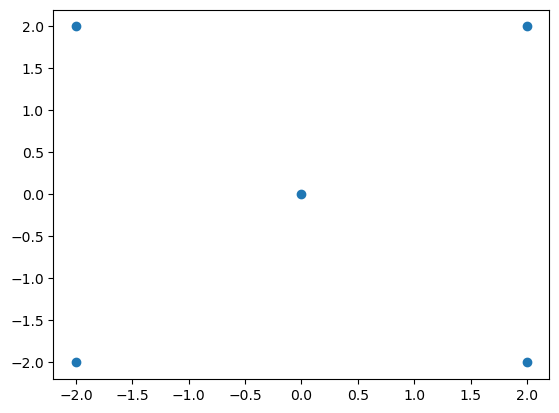

In [5]:
#1 having fixed points  we get the point moving toward them depending on 
# the strength of pulling to the given fixed point

# importing two required module 
import numpy as np
import matplotlib.pyplot as plt
import toolz
import optax
import jax.numpy as jnp
import jax


def get_contribution_in_axes(fixed_point,strength):
    # print(f"fixed_point {fixed_point} strength {strength}")
    e_x= jnp.array([1.0,0.0])
    e_y= jnp.array([0.0,1.0])
    x=optax.cosine_similarity(e_x,fixed_point)*strength
    y=optax.cosine_similarity(e_y,fixed_point)*strength
    return jnp.array([x,y])
v_get_contribution_in_axes=jax.vmap(get_contribution_in_axes)



points_const= jnp.array([[-2.0,-2.0],[-2.0,2.0],[2.0,2.0],[2.0,-2.0]])
# points_const= jnp.array([[2.0,2.0],[2.0,4.0],[4.0,4.0],[4.0,2.0]])
attraction_strength=jnp.array([1.0,1.0,1.0,1.0])
to_move=v_get_contribution_in_axes(points_const,attraction_strength)


# to_move=list(map(lambda tuple: get_contribution_in_axes(tuple[0],tuple[1]), list(zip(points_const,attraction_strength ) )))
# to_move=jnp.stack(to_move)
calced=jnp.sum(to_move,axis=0)
calced= jnp.expand_dims(calced,axis=0)
points_const= jnp.concatenate([points_const,calced],axis=0)
X,Y=list(toolz.sandbox.core.unzip(points_const))
X=list(X)
Y=list(Y)
plt.scatter(X,Y)
plt.show()


# optax.cosine_distance(jnp.array([[2.0,2.0]]),jnp.array([[2.0,2.0]]))

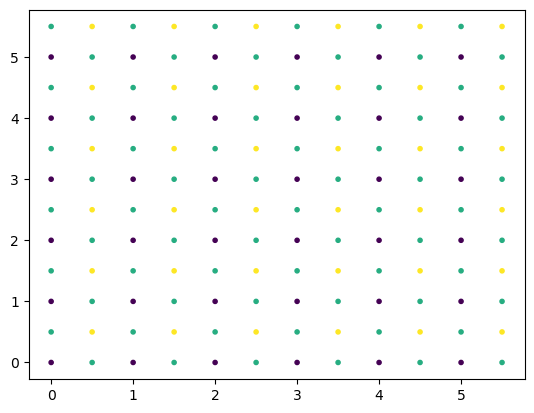

array([[0.5, 0.5],
       [0.5, 1.5],
       [0.5, 2.5],
       [0.5, 3.5],
       [0.5, 4.5],
       [0.5, 5.5],
       [1.5, 0.5],
       [1.5, 1.5],
       [1.5, 2.5],
       [1.5, 3.5],
       [1.5, 4.5],
       [1.5, 5.5],
       [2.5, 0.5],
       [2.5, 1.5],
       [2.5, 2.5],
       [2.5, 3.5],
       [2.5, 4.5],
       [2.5, 5.5],
       [3.5, 0.5],
       [3.5, 1.5],
       [3.5, 2.5],
       [3.5, 3.5],
       [3.5, 4.5],
       [3.5, 5.5],
       [4.5, 0.5],
       [4.5, 1.5],
       [4.5, 2.5],
       [4.5, 3.5],
       [4.5, 4.5],
       [4.5, 5.5],
       [5.5, 0.5],
       [5.5, 1.5],
       [5.5, 2.5],
       [5.5, 3.5],
       [5.5, 4.5],
       [5.5, 5.5]])

In [68]:
import einops

gridd=einops.rearrange(np.mgrid[0:6, 0:6],'c x y-> (x y) c')
# gridd=einops.rearrange(gridd,'(a e d) c-> d e a c', d=2,e=2)
grid_a_points=gridd
grid_b_points=np.concatenate([gridd+[0.5,0.0],gridd+[0,0.5]])
grid_c_points=gridd+[0.5,0.5]

x=np.concatenate([grid_a_points[:,0],grid_b_points[:,0],grid_c_points[:,0]])
y=np.concatenate([grid_a_points[:,1],grid_b_points[:,1],grid_c_points[:,1]])
c= np.concatenate([np.ones_like(grid_a_points[:,1])-0.9,np.ones_like(grid_b_points[:,1])+0.9,np.ones_like(grid_c_points[:,1])+2.0])
plt.scatter(x,y,s=9.0,c=c)
plt.show()

grid_c_points


In [17]:
np.dot([2,2],[2,2])
np.dot([2,2],[2,2])

8

In [3]:
import optax
import jax.numpy as jnp
optax.cosine_distance(jnp.array([[2.0,2.0]]),jnp.array([[2.0,2.0]]))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Array([5.9604645e-08], dtype=float32)

In [4]:
optax.cosine_similarity(jnp.array([[2.0,2.0]]),jnp.array([[-2.0,-2.0]]))

Array([-0.99999994], dtype=float32)